# Credit Card Default

## Import Data

In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [23]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", sheet_name = 0, skiprows= 1, header = 0)
# set col_name to lower case
col_name = [name.lower() for name in df.columns]
df.columns=col_name
df.rename(columns={'default payment next month':'default'}, inplace=True)
df.to_csv("data.csv", sep =',', header=True, index = False)

In [13]:
df = pd.read_csv("data.csv")

In [14]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Exploration
There are no missing values as seen below.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         30000 non-null  int64
 1   limit_bal  30000 non-null  int64
 2   sex        30000 non-null  int64
 3   education  30000 non-null  int64
 4   marriage   30000 non-null  int64
 5   age        30000 non-null  int64
 6   pay_0      30000 non-null  int64
 7   pay_2      30000 non-null  int64
 8   pay_3      30000 non-null  int64
 9   pay_4      30000 non-null  int64
 10  pay_5      30000 non-null  int64
 11  pay_6      30000 non-null  int64
 12  bill_amt1  30000 non-null  int64
 13  bill_amt2  30000 non-null  int64
 14  bill_amt3  30000 non-null  int64
 15  bill_amt4  30000 non-null  int64
 16  bill_amt5  30000 non-null  int64
 17  bill_amt6  30000 non-null  int64
 18  pay_amt1   30000 non-null  int64
 19  pay_amt2   30000 non-null  int64
 20  pay_amt3   30000 non-null  int64
 21  pay_amt4   3

**Data Description**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: 
    - -1 = pay duly; 
    - 1 = payment delay for one month; 
    - 2 = payment delay for two months; . . .; 
    - 8 = payment delay for eight months; 
    - 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)

In [161]:
# Drop Column "ID" -> does not add value
df = df.iloc[:,1:]

In [163]:
df.bill_amt6.iloc[3330]

49940

### EDA

#### Imbalanced Data
As seen from the default class, the data is highly unbalanced. 78% of the data is for accounts that have not defaulted whereas only 22% of the data is for defaulted accounts. 

[Text(0, 0, '77.88'), Text(0, 0, '22.12')]

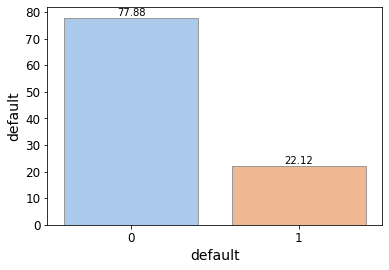

In [130]:
import seaborn as sns
g = sns.barplot(x='default', y='default', data=df, estimator=lambda x: len(x)/len(df)*100, palette="pastel", edgecolor=".6")
g.bar_label(g.containers[0])

#### Sex Category

- X2: Gender (1 = male; 2 = female).

<AxesSubplot:xlabel='sex', ylabel='percent'>

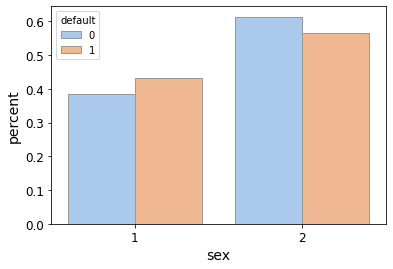

In [131]:
df.groupby("default")['sex'].value_counts(normalize=True).rename('percent').reset_index()\
    .pipe((sns.barplot, "data"),x='sex', y='percent', hue='default',palette="pastel", edgecolor=".6")

#### Education Category

- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).


<AxesSubplot:xlabel='education', ylabel='percent'>

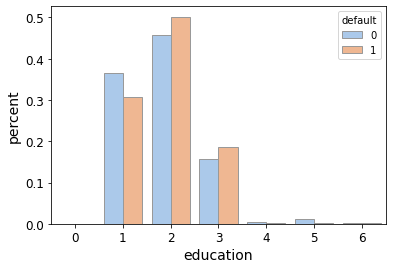

In [132]:
df.groupby("default")['education'].value_counts(normalize=True).rename('percent').reset_index()\
    .pipe((sns.barplot, "data"),x='education', y='percent', hue='default', palette="pastel", edgecolor=".6")

#### Marriage Category

- X4: Marital status (1 = married; 2 = single; 3 = others).


<AxesSubplot:xlabel='marriage', ylabel='percent'>

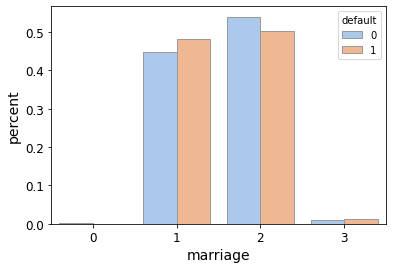

In [133]:
df.groupby("default")['marriage'].value_counts(normalize=True).rename('percent').reset_index()\
    .pipe((sns.barplot, "data"),x='marriage', y='percent', hue='default', palette="pastel", edgecolor=".6")

#### Age Distribution

- X5: Age (year).


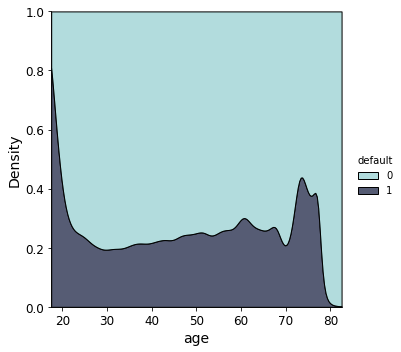

In [158]:
sns.displot(df, x ='age', hue='default', kind='kde',
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",)

#### Balance Limit Distribution

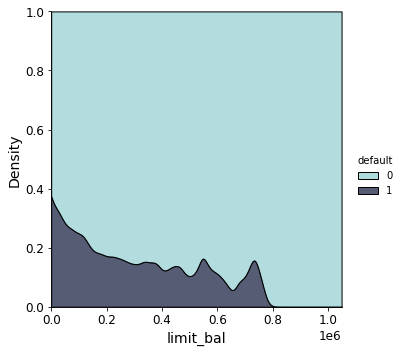

In [159]:
sns.displot(df, x ='limit_bal', hue='default', kind='kde',
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",)

## Split Data into Training and Test
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)